#Importing important libraries-

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [ ]:
pip install scikit-multilearn

# Stack Overflow: Tag Prediction

##1. Business Problem

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

In [ ]:
#Installing Kaggle library in order to download Kaggle dataset-
pip install kaggle

In [ ]:
#Function to connect to Kaggle api - 
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"siddharthsrivastava5","key":"84a806537f7d3bc63dc8c3fc9a2b4e85"}

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Authenticate API-
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
#Setting up the environmnet to download dataset from Kaggle to google drive-
import os
os.environ['KAGGLE_USERNAME'] = "siddharthsrivastava5" # username from the json file
os.environ['KAGGLE_KEY'] = "84a806537f7d3bc63dc8c3fc9a2b4e85" # key from the json file
!kaggle competitions download -c facebook-recruiting-iii-keyword-extraction -p/content/drive/MyDrive

100% 4.81M/4.81M [00:00<00:00, 47.7MB/s]
100% 4.81M/4.81M [00:00<00:00, 47.5MB/s]
 99% 717M/725M [00:04<00:00, 166MB/s]
100% 725M/725M [00:04<00:00, 162MB/s]
100% 2.19G/2.19G [00:18<00:00, 111MB/s] 
100% 2.19G/2.19G [00:18<00:00, 127MB/s]


In [ ]:
#Unzipping the train file-
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/stackoverflow_Train.csv')

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

Note-Loading the dataset into sql lite db because of its size-

In [ ]:
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('/content/drive/MyDrive/stackoverflow_Train.csv/Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

180000 rows
360000 rows
540000 rows
720000 rows
900000 rows
1080000 rows
1260000 rows
1440000 rows
1620000 rows
1800000 rows
1980000 rows
2160000 rows
2340000 rows
2520000 rows
2700000 rows
2880000 rows
3060000 rows
3240000 rows
3420000 rows
3600000 rows
3780000 rows
3960000 rows
4140000 rows
4320000 rows
4500000 rows
4680000 rows
4860000 rows
5040000 rows
5220000 rows
5400000 rows
5580000 rows
5760000 rows
5940000 rows
6120000 rows
Time taken to run this cell : 0:05:05.226711


##Checking for total no of datapoints-

In [ ]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:00:12.830045


##Checking for duplicate rows in the dataset-

In [ ]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_dup_rows = pd.read_sql_query("""SELECT  Title, Body, Tags ,count(*) as dup_count FROM data group by  Title, Body, Tags """, con)
    #Always remember to close the database
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Time taken to count the number of rows : 0:03:02.820788


In [ ]:
num_dup_rows.head()

,Title,Body,Tags,dup_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [ ]:
num_dup_rows.shape

(4206315, 4)

##Conclusion-


%of duplicates in the data=((-4206315+6034196)/6034196)*100=30%

Hence duplicate needs to be removed



#Num tags per question-

In [ ]:
num_dup_rows['Tags'].apply(lambda x:len(str(x).split(' '))).value_counts()

3    1206157
2    1111706
4     814996
1     568298
5     505158
Name: Tags, dtype: int64

##Conclusion-

Maxminum no of questions (ie 1.2 million) have 3 tags and small no ouf question (0.5 million) when compared to this have 5 tags



In [ ]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(num_dup_rows, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

##Analysis on tags-

In [ ]:
#Loading the data -

import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('/content/drive/MyDrive/Copy of train_no_dup.db')

df = pd.read_sql_query("SELECT * FROM no_dup_train", cnx)
cnx.close()

In [ ]:
#Displaying 1st five rows of the dataframe-
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df.head()

,Title,Body,Tags
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc


#Popular tags or most present tag in this datset-

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
clf=CountVectorizer(tokenizer = lambda x: x.split())
tag_vectors=clf.fit_transform(df['Tags'])


In [ ]:
from collections import OrderedDict

d2=OrderedDict(sorted(clf.vocabulary_.items(),key=lambda x: x[1]))

In [ ]:
print(d2.keys())

odict_keys(['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc', '.mobi', '.mov', '.net', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.0-rc1', '.net-4.5', '.net-assembly', '.net-authorization', '.net-bcl', '.net-bugs', '.net-cf-3.5', '.net-client-profile', '.net-compact', '.net-framework', '.net-framework-source', '.net-framework-version', '.net-gadgeteer', '.net-install', '.net-internals', '.net-interview', '.net-micro-framework', '.net-reflector', '.net-remoting', '.net-security', '.net-services', '.net2.0', '.net3.5', '.net4.0', '.netrc', '.nettiers', '.obj', '.post', '.procmailrc', '.profile', '.railsrc', '.rdlc', '.refresh', '.sbr', '.screenrc', '.sdf', '.sys', '.vdproj', '.war', '.wav', '.when', '.x', '10.8', '1080p', '10gbethernet', '10gen-csharp-driver', '10gige',

In [ ]:
tags_frequency=tag_vectors.sum(axis=0)

In [ ]:
dict={}

for i,j in zip(list(d2.keys()),tags_frequency.tolist()[0]):
  dict[i]=j

In [ ]:
dict['c++']

143936

In [ ]:
#Printing the top 5 most used tags with its frequency-
 
d3=OrderedDict(sorted(dict.items(),key=lambda x:x[1],reverse=True))
# tags_name=list(d2.keys())
# tags_freq=d2.values()
frequent_Tags_freq_name=pd.DataFrame(data=list(d3.items()),columns=['tags_name','tags_freq'])

In [ ]:
#Printing the top 5 most used tags with its frequency-
frequent_Tags_freq_name.head()

,tags_name,tags_freq
0,c#,331505
1,java,299414
2,php,284103
3,javascript,265423
4,android,235436


##Conclusion-

Most popular tag name is 'c#' which is present 331505 times and top 5 tags are 'c#',"java','php','javascript','android' etc.. this concludes that most of the questions in this dataset belongs to programming language

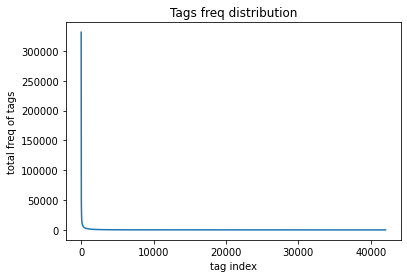

In [ ]:
#Looking at the distribution of the tagname across all questions-
tags_freq_num=frequent_Tags_freq_name['tags_freq'].tolist()
plt.plot(tags_freq_num)
plt.xlabel("tag index")
plt.ylabel("total freq of tags")
plt.title("Tags freq distribution")
plt.show()

##Conclusion-

As we can see that it is a very skewed distribution where only few tags are occuring many times and most of the tags are occuring very few times

In [ ]:
#Visualizing the percentile value in order to prove this-
i=np.arange(5,100,5).tolist()
j=np.percentile((frequent_Tags_freq_name['tags_freq'].values),i,axis=0).tolist()

for a ,b in zip(j,i):
  print("{}th percentile value is :{}".format(b,a))

5th percentile value is :1.0
10th percentile value is :2.0
15th percentile value is :3.0
20th percentile value is :4.0
25th percentile value is :5.0
30th percentile value is :7.0
35th percentile value is :8.0
40th percentile value is :11.0
45th percentile value is :13.0
50th percentile value is :17.0
55th percentile value is :21.0
60th percentile value is :27.0
65th percentile value is :35.0
70th percentile value is :48.0
75th percentile value is :66.0
80th percentile value is :97.0
85th percentile value is :152.0
90th percentile value is :278.0
95th percentile value is :712.0


In [ ]:


np.percentile((frequent_Tags_freq_name['tags_freq'].values),np.arange(95,100,0.01))

array([   712.        ,    713.        ,    715.        ,    717.        ,
          718.4688    ,    720.6735    ,    722.        ,    725.        ,
          726.        ,    727.4923    ,    730.        ,    731.        ,
          733.        ,    733.3111    ,    735.        ,    737.        ,
          738.9252    ,    741.        ,    742.3346    ,    744.        ,
          745.        ,    746.        ,    747.1534    ,    749.3581    ,
          751.        ,    756.        ,    760.        ,    763.1769    ,
          765.        ,    766.5863    ,    769.791     ,    771.9957    ,
          772.        ,    774.4051    ,    776.        ,    777.        ,
          779.        ,    780.        ,    781.        ,    783.6333    ,
          784.838     ,    786.        ,    788.2474    ,    790.4521    ,
          794.6568    ,    797.        ,    798.1324    ,    802.        ,
          803.4756    ,    806.6803    ,    809.77      ,    811.0897    ,
          813.        ,  

##Conclusion-

max freq of tag that is occured is 'c++' and here we can see that 95% of datapoints have tags_freq equal to 712 or less ie there are some tags which occur very less frequent and we have very large no of datapoints that have tags freq very less in compared to higher tag freq.

In [ ]:
frequent_Tags_freq_name['tags_freq'].loc[frequent_Tags_freq_name['tags_freq']>127440.51800325]

0    331505
1    299414
2    284103
3    265423
4    235436
5    221533
6    143936
7    134137
8    128681
Name: tags_freq, dtype: int64

##Plotting top 20 most popular tags-

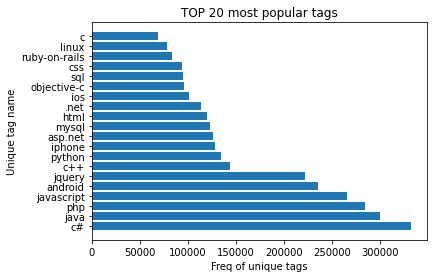

In [ ]:
plt.barh((list(frequent_Tags_freq_name['tags_name'].iloc[:20].values)),(list(frequent_Tags_freq_name['tags_freq'].iloc[:20].values)))
plt.xlabel("Freq of unique tags")
plt.ylabel("Unique tag name")
plt.title("TOP 20 most popular tags")
plt.show()

##No of tags per question-



In [ ]:
df['num_tags_per_question']=df['Tags'].apply(lambda x: len(x.split(' ')))


In [ ]:
#Printing the total vlaues of no of tags present - 
temp1=temp.value_counts()

In [ ]:
print(temp1)

3    1206157
2    1111706
4     814996
1     568298
5     505158
Name: Tags, dtype: int64


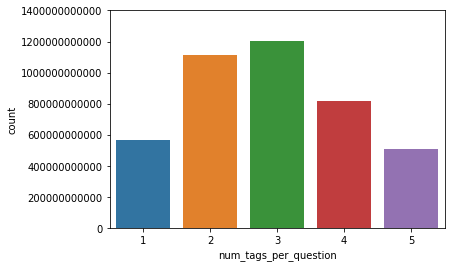

In [ ]:
#Plotting the histogram for the count-
count=sns.countplot(data=df,x="num_tags_per_question")
plt.ylim(0, 1400000)
y_tick_labels=[int(i*(10**6))for i in count.get_yticks()]
count.set_yticklabels(y_tick_labels)
plt.show()

##Most frequent tags visualization using wordcloud-

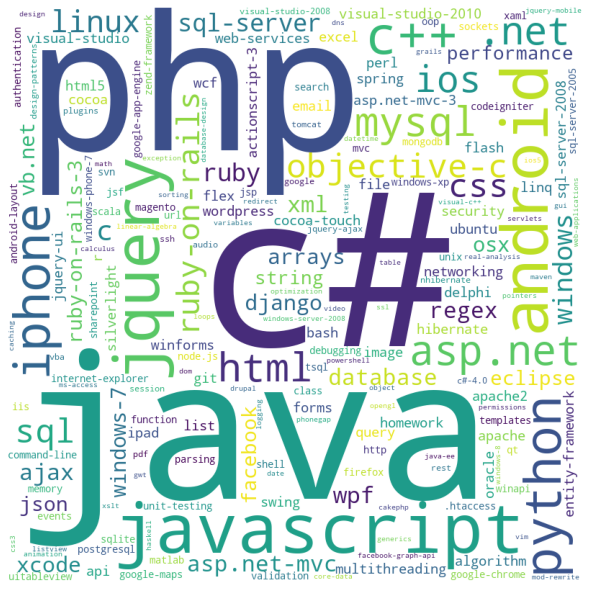

In [ ]:

from wordcloud import WordCloud,STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
# for val in df.Tags:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(d3)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Text Preprocessing/Cleaning-

<ol> 
    <li> Sample 1M data points </li> (bcoz of computational challenges)
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [ ]:
#Extracting sentences from tags and removing the tags can be done by-

#1st method -BeautifulSoup
from bs4 import BeautifulSoup

In [ ]:
html = '''
<pre><code>#include&lt;iostream&gt;
#include&lt;stdlib.h&gt;

using namespace std;

int main()
{
         int n,a[n],x,c,u[n],m[n],e[n][4];
         cout&lt;&lt;"Enter the number of variables";
         cin&gt;&gt;n;

         cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";
         for(int y=1; y&lt;n+1; y++)
         {
                 cin&gt;&gt;m[y];
                 cin&gt;&gt;u[y];
         }
         for(x=1; x&lt;n+1; x++)
         {
                 a[x] = (m[x] + u[x])/2;
         }
         c=(n*4)-4;
         for(int a1=1; a1&lt;n+1; a1++)
         {

             e[a1][0] = m[a1];
             e[a1][1] = m[a1]+1;
             e[a1][2] = u[a1]-1;
             e[a1][3] = u[a1];
         }
         for(int i=1; i&lt;n+1; i++)
         {
            for(int l=1; l&lt;=i; l++)
            {
                 if(l!=1)
                 {
                    cout&lt;&lt;a[l]&lt;&lt;"\t";
                 }
            }
            for(int j=0; j&lt;4; j++)
            {
                cout&lt;&lt;e[i][j];
                for(int k=0; k&lt;n-(i+1); k++)
                {
                    cout&lt;&lt;a[k]&lt;&lt;"\t";
                }
                cout&lt;&lt;"\n";
            }
        }    

        system("PAUSE");
        return 0;    
}
</code></pre>

<p>The answer should come in the form of a table like</p>

<pre><code>       1            50              50
       2            50              50
       99           50              50
       100          50              50
       50           1               50
       50           2               50
       50           99              50
       50           100             50
       50           50              1
       50           50              2
       50           50              99
       50           50              100
</code></pre>

<p>if the no of inputs is 3 and their ranges are
1,100
1,100
1,100
(could be varied too)</p>

<p>The output is not coming,can anyone correct the code or tell me what's wrong?</p>'''

soup = bs4.BeautifulSoup(html)
first_par = soup.findAll('p')
print(first_par)




[<p>The answer should come in the form of a table like</p>, <p>if the no of inputs is 3 and their ranges are
1,100
1,100
1,100
(could be varied too)</p>, <p>The output is not coming,can anyone correct the code or tell me what's wrong?</p>]


In [ ]:
import bs4

In [ ]:
#Finding tags that contain only p tag as rest are code snippets which should be excluded and then performing text cleaning-
#Regex/code for doing this-
import re
from nltk.stem.snowball import SnowballStemmer
ss=SnowballStemmer(language='english')
temp=df['Body'].apply(lambda x: re.findall('((<pre><code)(.*?)(</code></pre>))+',x, flags=re.MULTILINE|re.DOTALL))
temp2=df['Title'].apply(lambda x: re.findall('<p>(.*?)</p>',x, flags=re.MULTILINE|re.DOTALL))
temp3=temp.apply(lambda x:x.encode('utf-8'))
tem4=temp2.apply(lambda x:x.encode('utf-8'))
temp5=temp3.apply(lambda x:striphtml(x))
temp6=temp4.apply(lambda x:striphtml(x))
temp7=temp5.apply(lambda x: re.sub("[^A-Za-z]+",' ',x,flags=re.DOTALL))
temp8=temp6.apply(lambda x: re.sub("[^A-Za-z]+",' ',x,flags=re.DOTALL))
temp9=temp7.apply(lambda x:[ss.stem(i) for i in x.split(' ')])
temp10=temp8.apply(lambda x:[ss.stem(i) for i in x.split(' ')])
temp11=temp9.apply(lambda x:[k for k in x.split(' ') if k not in stopwords and(len(k)!=1 or k=='c')])
temp12=temp10.apply(lambda x:[k for k in x.split(' ') if k not in stopwords and(len(k)!=1 or k=='c')])
temp13=temp11.apply(lambda x:' '.join(x))
temp14=temp12.apply(lambda x:' '.join(x))
df['Body']=temp13.tolist()
df['Title']=temp14.tolist()
#Merging body and titile into one single question label=
questions=df[['Body','Title']].apply(lambda x: str(x[0]+str(x[1])),axis=1)



['The answer should come in the form of a table like', 'if the no of inputs is 3 and their ranges are\n1,100\n1,100\n1,100\n(could be varied too)', "The output is not coming,can anyone correct the code or tell me what's wrong?"]


In [ ]:
#Removing Html tags from the questions-
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

##Creating a database to store all these preprcessed data-

In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

##Limiting the data to 1 million due to computation limitations-

In [ ]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 1000000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [ ]:
#Taking 1 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

##Reading the preprocessed data now-

In [ ]:
# Create your connection.
cnx = sqlite3.connect('/content/drive/MyDrive/Copy of Processed.db')

df_preprocessed = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", cnx)
cnx.close()

In [ ]:
df_preprocessed.head()

,question,tags
0,chang cpu soni vaio pcg grx tri everywher find...,cpu motherboard sony-vaio replacement disassembly
1,display size grayscal qimag qt abl display ima...,c++ qt qt4
2,datagrid selecteditem set back null eventtocom...,mvvm silverlight-4.0
3,filter string collect base listview item resol...,c# winforms string listview collections
4,disabl home button without use type keyguard c...,android android-layout android-manifest androi...


#Machine learning models-


##Converting the tags into a multilabel setting of binary vectors-


<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
clf=CountVectorizer(tokenizer=lambda x:x.split(' '))
tags_vectorizer=clf.fit(df_preprocessed['tags'])

In [ ]:
print(len(list(tags_vectorizer.vocabulary_.keys())))

35422


### Since labels are in 35k dimensions so that means we have to train 35k model if we go via OVR approach , so that will be cumbersome and computationaly expensive , hence we will apply partial samplung on the labels where we will be only taking the no of labels that are covering most of the questions, as a result of it we will have labels of dimensions less than 35k and also it will reduce the commputation effort as we have to train less models

In [ ]:
tags_Vectorizer_transform=clf.transform(df_preprocessed['tags'])


In [ ]:
t=tags_Vectorizer_transform.sum(axis=0)

In [ ]:
print(t.tolist())

[[2, 7, 1, 6, 26, 13, 4, 15, 1, 40, 9, 2, 2, 3604, 11, 1, 3, 1, 1, 26956, 2, 45, 397, 11, 882, 1206, 6, 3, 176, 140, 1, 15, 11, 62, 3, 20, 1, 2, 2, 33, 5, 30, 4, 3, 2, 13, 10, 2, 6, 22, 24, 5, 16, 1, 11, 2, 5, 8, 1, 1, 9, 13, 1, 1, 1, 1, 5, 1, 9, 28, 1, 2, 2, 1, 2, 7, 2, 1, 3, 2, 7, 512, 904, 161, 1, 3, 8, 4, 368, 1, 82, 11, 4, 4, 4, 33, 4, 101, 9, 21, 3, 5, 28, 92, 1, 101, 193, 2, 11, 6, 2, 2, 5, 9, 948, 4, 6, 13, 4, 14, 11, 2, 9, 1, 1, 1, 2, 5, 1, 17, 2, 6, 10, 27, 106, 6, 17, 7, 16, 2, 27, 17, 2, 7, 18, 46, 65, 4, 2, 7, 7, 2, 2, 9, 6, 23, 2, 4, 5, 1, 12, 5, 7, 6, 439, 427, 4, 5, 2, 1, 3, 57, 3, 4, 2, 66, 3, 17, 4, 15, 2, 3, 12, 24, 4, 1, 50, 1, 9, 1, 1, 47, 1, 16, 3, 42, 10, 1, 5, 53, 4, 16, 2, 6, 8, 68, 5, 2, 2, 75, 3, 11, 3, 9, 1, 27, 15, 83, 6, 1, 18, 3, 1, 4, 1, 34, 1, 4, 7, 5, 6, 2, 5, 5, 2, 6, 60, 43, 136, 33, 16, 123, 2, 1557, 223, 11, 8, 1, 1, 6, 37, 2, 78, 16, 9, 8, 1, 4, 1, 2, 7, 11, 3, 23, 17, 194, 11, 36, 13, 3, 43, 4, 1, 85, 5, 4, 83, 1, 96, 6, 5, 5, 21, 61, 35, 7, 2, 1

In [ ]:
freq_dict={}

for i,j in zip(clf.get_feature_names(),t.tolist()[0]):
  freq_dict[i]=j
  

In [ ]:
print(freq_dict)

{'.a': 2, '.app': 7, '.asp.net-mvc': 1, '.aspxauth': 6, '.bash-profile': 26, '.class-file': 13, '.cs-file': 4, '.doc': 15, '.ds-store': 1, '.each': 40, '.emf': 9, '.exe': 2, '.hgtags': 2, '.htaccess': 3604, '.htpasswd': 11, '.ico': 1, '.lib': 3, '.mobi': 1, '.mov': 1, '.net': 26956, '.net-1.0': 2, '.net-1.1': 45, '.net-2.0': 397, '.net-3.0': 11, '.net-3.5': 882, '.net-4.0': 1206, '.net-4.0-beta-2': 6, '.net-4.0-rc1': 3, '.net-4.5': 176, '.net-assembly': 140, '.net-authorization': 1, '.net-cf-3.5': 15, '.net-client-profile': 11, '.net-framework': 62, '.net-framework-source': 3, '.net-framework-version': 20, '.net-gadgeteer': 1, '.net-install': 2, '.net-internals': 2, '.net-micro-framework': 33, '.net-reflector': 5, '.net-remoting': 30, '.net-security': 4, '.net-services': 3, '.net2.0': 2, '.net3.5': 13, '.net4.0': 10, '.netrc': 2, '.nettiers': 6, '.obj': 22, '.post': 24, '.procmailrc': 5, '.profile': 16, '.railsrc': 1, '.rdlc': 11, '.sdf': 2, '.war': 5, '.wav': 8, '.when': 1, '.x': 1, '

In [ ]:
from collections import OrderedDict
freq_dict=OrderedDict(sorted(freq_dict.items(),key=lambda x: x[1],reverse=True))


In [ ]:
print(freq_dict)

OrderedDict([('c#', 79133), ('java', 71218), ('php', 67468), ('javascript', 63286), ('android', 55832), ('jquery', 52805), ('c++', 34248), ('python', 31583), ('iphone', 30614), ('asp.net', 29850), ('mysql', 28844), ('html', 28521), ('.net', 26956), ('ios', 24172), ('objective-c', 22802), ('css', 22510), ('sql', 22494), ('ruby-on-rails', 19848), ('linux', 18828), ('c', 16306), ('windows', 14853), ('ruby', 12584), ('sql-server', 12337), ('wpf', 11038), ('xml', 10988), ('ajax', 10606), ('regex', 10151), ('database', 10088), ('asp.net-mvc', 9858), ('xcode', 9007), ('arrays', 8817), ('django', 8661), ('osx', 8094), ('windows-7', 8019), ('vb.net', 7928), ('facebook', 7612), ('eclipse', 7590), ('json', 7522), ('ruby-on-rails-3', 7383), ('string', 6535), ('multithreading', 6484), ('performance', 6331), ('winforms', 6284), ('ubuntu', 6056), ('asp.net-mvc-3', 5958), ('visual-studio-2010', 5776), ('html5', 5634), ('image', 5609), ('networking', 5507), ('homework', 5380), ('wordpress', 5317), ('se

##Plotting the graph to see how many dimensions will be best suited to cover most of the questions-

In [ ]:
#Plotting the graph-
a=[]
questions_explained=[]
num_dimensions=[]
for i in range(50,35422,50):
  a=list(freq_dict.values())[:i]
  questions_explained.append((sum(a)/2899739)*100)
  num_dimensions.append(i)


In [ ]:
print(questions_explained)

[34.348194785806584, 41.60257181767049, 46.25574922432674, 49.98367094417808, 52.92521154490111, 55.32232383673151, 57.36802519123273, 59.13435657485036, 60.74891567827312, 62.23291130684521, 63.586205517117236, 64.81328147119447, 65.93789992823493, 66.98433893533176, 67.94949476487366, 68.8477135355975, 69.67654675127658, 70.45554789586235, 71.18375136520908, 71.87146843215889, 72.52159590914906, 73.13644434895691, 73.71680692641648, 74.26878763916339, 74.79790422517337, 75.30225996201727, 75.78602763903923, 76.25244892730001, 76.703248119917, 77.13587326307643, 77.55484200474595, 77.95794724973524, 78.34829272565565, 78.72839590045862, 79.09646350930204, 79.45077125906849, 79.79494016530452, 80.13028069077941, 80.45748255274009, 80.77340753771288, 81.07891779225648, 81.37384088705915, 81.66048737489822, 81.93927108612189, 82.20981267624431, 82.47190523009141, 82.72782481457814, 82.9780542317774, 83.22166236340581, 83.45913201153621, 83.69094597824149, 83.91658697558643, 84.1369516359

In [ ]:
print(num_dimensions)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 8500,

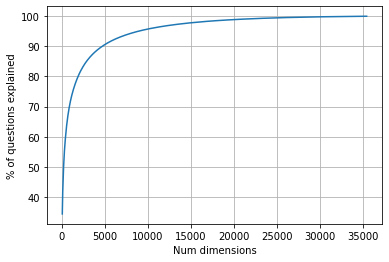

In [ ]:
plt.plot(num_dimensions,questions_explained)
plt.xlabel("Num dimensions")
plt.ylabel("% of questions explained")
plt.grid()
plt.show()


In [ ]:
#Consolidating the num _dimensions and % of questions explained ontoa single list to choose optimal no of dimensions for class label-
=sorted([(i,j)for i,j in zip(questions_explained,num_dimensions)],key=lambda x: x[0],reverse=True)

In [ ]:
print(consolidated_list)

[(99.99924131102834, 35400), (99.99751701791092, 35350), (99.9957927247935, 35300), (99.9940684316761, 35250), (99.99234413855868, 35200), (99.99061984544126, 35150), (99.98889555232384, 35100), (99.98717125920643, 35050), (99.98544696608901, 35000), (99.9837226729716, 34950), (99.98199837985419, 34900), (99.98027408673677, 34850), (99.97854979361935, 34800), (99.97682550050195, 34750), (99.97510120738453, 34700), (99.9733769142671, 34650), (99.9716526211497, 34600), (99.96992832803228, 34550), (99.96820403491486, 34500), (99.96647974179746, 34450), (99.96475544868004, 34400), (99.96303115556262, 34350), (99.96130686244521, 34300), (99.9595825693278, 34250), (99.95785827621037, 34200), (99.95613398309297, 34150), (99.95440968997555, 34100), (99.95268539685813, 34050), (99.95096110374072, 34000), (99.9492368106233, 33950), (99.94751251750588, 33900), (99.94578822438847, 33850), (99.94406393127106, 33800), (99.94233963815364, 33750), (99.94061534503622, 33700), (99.93889105191882, 33650)

##Conclusion-

Choosing the optimal value of 9200 dimensions which is covering almost 95% of data

In [ ]:
#Converting the class label to optimal num of dimensions-
#Choosing the top 9200 names from the vocabulary which will be used to fit the class label-
clf2=CountVectorizer(tokenizer=lambda x:x.split(' '),vocabulary=list(freq_dict.keys())[:9200])
top_tags_vectorizer=clf2.fit_transform(df_preprocessed['tags'])


['c#', 'java', 'php', 'javascript', 'android', 'jquery', 'c++', 'python', 'iphone', 'asp.net', 'mysql', 'html', '.net', 'ios', 'objective-c', 'css', 'sql', 'ruby-on-rails', 'linux', 'c', 'windows', 'ruby', 'sql-server', 'wpf', 'xml', 'ajax', 'regex', 'database', 'asp.net-mvc', 'xcode', 'arrays', 'django', 'osx', 'windows-7', 'vb.net', 'facebook', 'eclipse', 'json', 'ruby-on-rails-3', 'string', 'multithreading', 'performance', 'winforms', 'ubuntu', 'asp.net-mvc-3', 'visual-studio-2010', 'html5', 'image', 'networking', 'homework', 'wordpress', 'security', 'wcf', 'forms', 'algorithm', 'web-services', 'bash', 'git', 'visual-studio', 'query', 'oracle', 'linq', 'sql-server-2008', 'r', 'perl', 'spring', 'flash', 'actionscript-3', 'apache', 'ipad', 'silverlight', 'swing', 'cocoa-touch', 'cocoa', 'excel', 'hibernate', 'email', 'entity-framework', 'file', 'api', 'list', 'jquery-ui', 'apache2', '.htaccess', 'qt', 'flex', 'internet-explorer', 'delphi', 'node.js', 'shell', 'sqlite', 'tsql', 'google

In [ ]:
top_tags_vectorizer.shape

(999999, 9200)

##Vectorizing the questions-

<h2>4.2 Split the data into test and train (80:20) </h2>

In [ ]:
Y=df_preprocessed['tags']
df_preprocessed.drop(['tags'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(df_preprocessed,Y,test_size=0.20,random_state=42)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(799999, 1)
(200000, 1)
(799999,)
(200000,)


#Vectorizing the train and test data-

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
clf_3=TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
train_questions_vector=clf_3.fit_transform(X_Train['question'])
test_questions_vector=clf_3.transform(X_Test['question'])

In [ ]:
print(train_questions_vector.shape)
print(test_questions_vector.shape)

##Conclusion-

Session is crashing intermittently, hence doing the following modifications-

1) Reducing the datapoint from 1 million to 0.5 million
2) Reducing the class label dimensions to 500

##One observation- As we have noted down that most of the informations are given in title of the questions about the tags that is it belongs to which stream hence we will be giving more weightage to titles here.

<h2> 4.5 Modeling with less data points (0.5M data points) and more weight to title and 500 tags only. </h2>

In [ ]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

In [ ]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 500001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

##Doing the preprocessing again and giving titles about 3 times more weight hence would be repeating the title text three times and then create questions column with 3*title text +body text

In [ ]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Saving Preprocessed data to a Database __

In [ ]:
#Taking 0.5 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

##Loading the saved data-

In [ ]:
# Create your connection.
cnx = sqlite3.connect('/content/drive/MyDrive/Copy of Titlemoreweight.db')

df_preprocessed = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", cnx)
cnx.close()

In [ ]:
#Converting the class label to optimal num of dimensions-
#Choosing the top 9200 names from the vocabulary which will be used to fit the class label-
clf_4=CountVectorizer(tokenizer=lambda x:x.split(' '),vocabulary=list(freq_dict.keys())[:9200])
top_tags_vectorizer_train=clf_4.fit_transform(Y_Train['tags'])
top_tags_vectorizer_test=clf_4.transform(Y_Test['tags'])

In [ ]:
import numpy as np
a=np.array([[ 0.,  5.,  2.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  0.]])

In [ ]:
print(a[a!=0])

[5. 2. 3.]
